In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os
import PIL.Image
import imquality.brisque as brisque

In [2]:
IMAGE_SIZE = (640, 360)

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMAGE_SIZE) 
        if img is not None:
            images.append(img)
            
    return np.array(images, dtype='uint8')

In [3]:
def brisque_score(images):
    score = []
    for i in images:
        score.append(brisque.score(i))
    return score

In [4]:
r = load_images_from_folder('train/Rendah/')
s = load_images_from_folder('train/Sedang/')
t = load_images_from_folder('train/Tinggi/')

In [5]:
brisque_rendah = brisque_score(r)

c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them un

In [6]:
brisque_sedang = brisque_score(s)

c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them un

In [7]:
brisque_tinggi = brisque_score(t)

c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them un

In [8]:
re = os.listdir('train/Rendah/')
se = os.listdir('train/Sedang/')
ti = os.listdir('train/Tinggi/')

In [9]:
df_r = pd.DataFrame({'Filename': re,
                    'Label' : ['Rendah']*len(re),
                    'BRISQUE': brisque_rendah})
df_r.head()

,Filename,Label,BRISQUE
0,-FXLwjugI_Q.jpg,Rendah,69.953966
1,-Sgw-6a1HjU.jpg,Rendah,87.025152
2,-vQ8r-T4Pi4.jpg,Rendah,78.832508
3,2H3e8RgY7C0.jpg,Rendah,59.986038
4,2ITe5fdzCas.jpg,Rendah,-0.437054


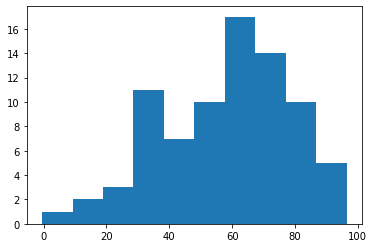

In [10]:
plt.hist(df_r.BRISQUE)
plt.show()

In [11]:
df_s = pd.DataFrame({'Filename': se,
                    'Label' : ['Sedang']*len(se),
                    'BRISQUE': brisque_sedang})
df_s.head()

,Filename,Label,BRISQUE
0,-pEs-Bss8Wc.jpg,Sedang,69.560888
1,0c6JXSQKEP4.jpg,Sedang,66.561633
2,0unqyeg7LXo.jpg,Sedang,46.451226
3,29ORwoToTww.jpg,Sedang,48.224585
4,3kPOahr0unM.jpg,Sedang,21.945777


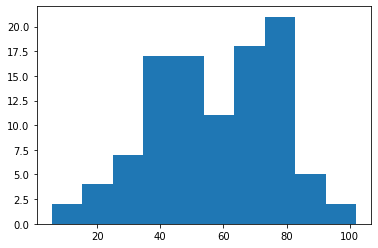

In [12]:
plt.hist(df_s.BRISQUE)
plt.show()

In [13]:
df_t = pd.DataFrame({'Filename': ti,
                    'Label' : ['Tinggi']*len(ti),
                    'BRISQUE': brisque_tinggi})
df_t.head()

,Filename,Label,BRISQUE
0,-VDXBHLU8q4.jpg,Tinggi,28.305001
1,01sAkU_NvOY.jpg,Tinggi,54.506853
2,0sOvCWFmrtA.jpg,Tinggi,61.213445
3,27u8xHqLMZE.jpg,Tinggi,49.872565
4,5O9abIxIqNA.jpg,Tinggi,8.841683


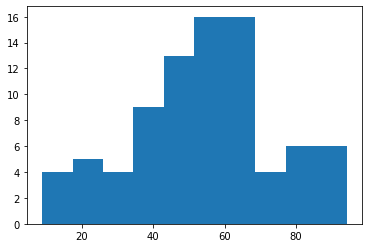

In [14]:
plt.hist(df_t.BRISQUE)
plt.show()

In [18]:
rv = load_images_from_folder('val/Rendah/')
sv = load_images_from_folder('val/Sedang/')
tv = load_images_from_folder('val/Tinggi/')

In [17]:
re_val = os.listdir('val/Rendah/')
se_val = os.listdir('val/Sedang/')
ti_val = os.listdir('val/Tinggi/')

In [19]:
brisque_rendah_val = brisque_score(rv)

c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them un

In [20]:
brisque_sedang_val = brisque_score(sv)

c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them un

In [21]:
brisque_tinggi_val = brisque_score(tv)

c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
c:\Users\farras\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them un

In [22]:
df_r_val = pd.DataFrame({'Filename': re_val,
                    'Label' : ['Rendah']*len(re_val),
                    'BRISQUE': brisque_rendah_val})
df_r_val.head()

,Filename,Label,BRISQUE
0,-BOBedcjySI.jpg,Rendah,66.266367
1,4EaYeZyzIB0.jpg,Rendah,67.611837
2,7guoq2ka7Gw.jpg,Rendah,85.567192
3,9G9bf5i7Im8.jpg,Rendah,31.486080
4,aaPtU0dFyAU.jpg,Rendah,40.827240


In [23]:
df_s_val = pd.DataFrame({'Filename': se_val,
                    'Label' : ['Rendah']*len(se_val),
                    'BRISQUE': brisque_sedang_val})
df_s_val.head()

,Filename,Label,BRISQUE
0,0DLnExXGrRE.jpg,Rendah,41.094176
1,2WL-XTl2QYI.jpg,Rendah,46.893474
2,4rymD1Hpnho.jpg,Rendah,57.872958
3,7utwZYKweho.jpg,Rendah,53.038811
4,8124kv-632k.jpg,Rendah,60.947748


In [24]:
df_t_val = pd.DataFrame({'Filename': ti_val,
                    'Label' : ['Rendah']*len(ti_val),
                    'BRISQUE': brisque_tinggi_val})
df_t_val.head()

,Filename,Label,BRISQUE
0,BiDOehqG68g.jpg,Rendah,61.188706
1,BKwnOOs0ml8.jpg,Rendah,105.627196
2,Ej_02ICOIgs.jpg,Rendah,80.336750
3,fP9IvI4qu80.jpg,Rendah,35.875815
4,jBzwzrDvZ18.jpg,Rendah,82.160866


In [30]:
all_brisque = pd.concat([df_r, df_s, df_t, df_r_val, df_s_val, df_t_val], axis=0)
all_brisque.reset_index()
all_brisque

,Filename,Label,BRISQUE
0,-FXLwjugI_Q.jpg,Rendah,69.953966
1,-Sgw-6a1HjU.jpg,Rendah,87.025152
2,-vQ8r-T4Pi4.jpg,Rendah,78.832508
3,2H3e8RgY7C0.jpg,Rendah,59.986038
4,2ITe5fdzCas.jpg,Rendah,-0.437054
...,...,...,...
14,qxYbHzn8bbU.jpg,Rendah,50.027360
15,rHux0gMZ3Eg.jpg,Rendah,66.305115
16,t8pPdKYpowI.jpg,Rendah,64.607091
17,tcxYkk16BCI.jpg,Rendah,32.718186


In [31]:
all_brisque.to_csv('all_brisque.csv', index=False)

In [4]:
reg_df = pd.read_csv('data_regresi.csv')
reg_df.head()

,Unnamed: 0,name,Detail Views,path,brightness,complexity,colorfulness,quality,BRISQUE
0,0,-BOBedcjySI.jpg,1808,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,88725.811789,0.945532,47.368014,1.0,66.266367
1,1,-FXLwjugI_Q.jpg,18463,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,118500.180335,0.981748,102.496555,1.0,69.953966
2,2,-pEs-Bss8Wc.jpg,249561,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,106622.882165,0.971479,96.841696,1.0,69.560888
3,3,-Sgw-6a1HjU.jpg,13040,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,108188.624456,0.976740,58.850563,1.0,87.025152
4,4,-VDXBHLU8q4.jpg,2231004,E:/00 KULYAH/SEMESTER 5/Data Mining II/UAS/Pro...,123443.470298,0.916993,81.369034,1.0,28.305001


In [5]:
reg_df.quality.value_counts()

1.0    213
1.0     79
1.0     27
1.0     10
1.0      3
1.0      1
1.0      1
Name: quality, dtype: int64

In [8]:
x = reg_df.iloc[:, 4:]
y = reg_df.iloc[:,2]

In [17]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [9]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(x, y)  

RandomForestRegressor(random_state=0)

In [20]:
# Use the forest's predict method on the test data
predictions = regressor.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 218330.0 degrees.


In [21]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -1472.01 %.


In [23]:
feature_list = list(x.columns)
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: complexity           Importance: 0.29
Variable: colorfulness         Importance: 0.27
Variable: brightness           Importance: 0.23
Variable: BRISQUE              Importance: 0.21
Variable: quality              Importance: 0.0
